In [27]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
df = pd.read_csv("email.csv")

In [28]:
df.rename(columns={'Category': 'label', 'Message': 'text'}, inplace=True)
df = df.dropna()

In [29]:
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5573 non-null   object
 1   text    5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [36]:
df = df[df['label'].isin(['ham', 'spam'])]

In [37]:
print(df['label'].value_counts().to_dict())


{'ham': 4825, 'spam': 747}


<ipython-input-38-3b6c50857493>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='viridis')


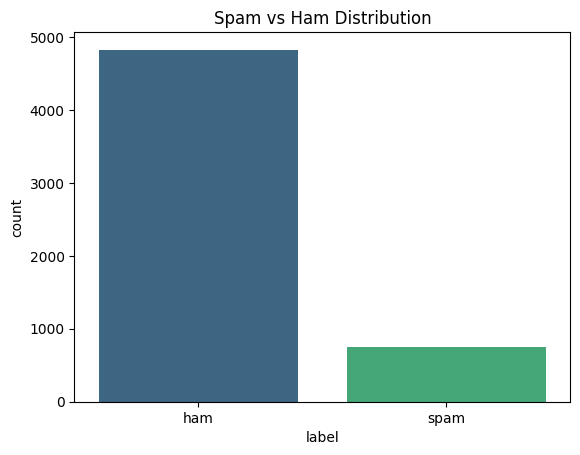

In [38]:
sns.countplot(x=df['label'], palette='viridis')
plt.title("Spam vs Ham Distribution")
plt.show()

(-0.5, 399.5, 299.5, -0.5)

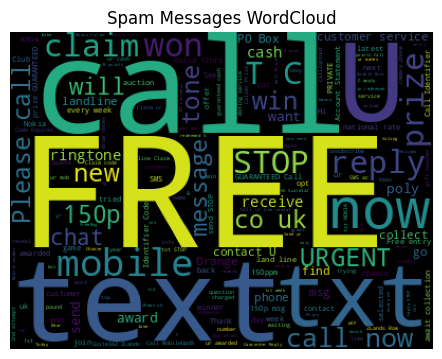

In [39]:
spam_words = " ".join(df[df['label'] == 'spam']['text'])
ham_words = " ".join(df[df['label'] == 'ham']['text'])

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=300, background_color='black').generate(spam_words))
plt.title("Spam Messages WordCloud")
plt.axis("off")

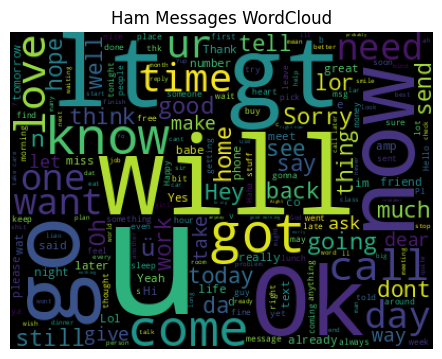

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=300, background_color='black').generate(ham_words))
plt.title("Ham Messages WordCloud")
plt.axis("off")
plt.show()

In [42]:
df['label'] = df['label'].apply(lambda x: 1 if x.strip().lower() == 'spam' else 0)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9560538116591928

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.67      0.80       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



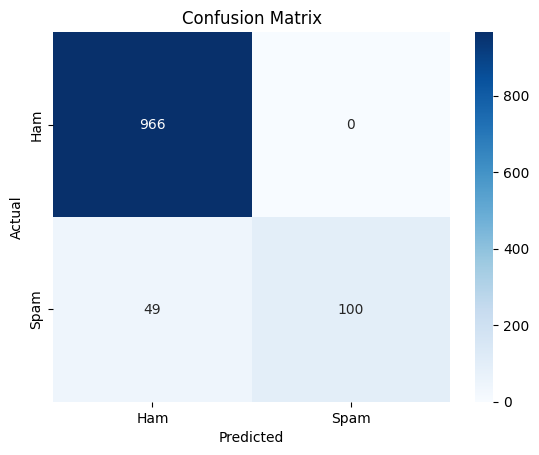

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()